In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from skyfield.api import load
#commented out the line below becasue i already downloaed it
#!pip install skyfield
%pip install -q "xlrd>=2.0.1"
from pathlib import Path
%pip -q install geopy
%pip -q install geopy

import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from datetime import datetime
from IPython.display import display

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [127]:
%pip install -q python-dotenv anthropic

from dotenv import load_dotenv
load_dotenv(override=True)  # <-- pick up the new value

import os
print("has_ANTHROPIC_API_KEY:", bool(os.getenv("ANTHROPIC_API_KEY")))

Note: you may need to restart the kernel to use updated packages.
has_ANTHROPIC_API_KEY: True


In [128]:
# From the project details it told me to download the messier objects, i just found someone's github repo that had then and then i double checked with claude if it was accuture, here im going to import then and then we can start.


The `!pip install` command will install the xlrd package in your environment. After that, the pandas read_excel function should work correctly with your .xls file.


The `!pip install` command will install the xlrd package in your environment. After that, the pandas read_excel function should work correctly with your .xls file.

//this is where i tried to import the messier files from a github boy was that a mistake but i wanted to document the journey
!git clone https://github.com/mattiaverga/OpenNGC.git


#Gave me an error so i fixed it by adding spe = ';'
ngc = pd.read_csv("OpenNGC/database_files/NGC.csv")
ngc.head()

In [129]:
ngc = pd.read_csv("OpenNGC/database_files/NGC.csv", sep=';')
ngc.head()

,Name,Type,RA,Dec,Const,MajAx,MinAx,PosAng,B-Mag,V-Mag,...,Cstar V-Mag,M,NGC,IC,Cstar Names,Identifiers,Common names,NED notes,OpenNGC notes,Sources
0,IC0001,**,00:08:27.05,+27:43:03.6,Peg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99
1,IC0002,G,00:11:00.88,-12:49:22.3,Cet,0.98,0.32,142.0,15.46,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00110081-1249206,IRAS 00084-1306,MCG -0...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
2,IC0003,G,00:12:06.09,-00:24:54.8,Psc,0.93,0.67,53.0,14.78,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00120604-0024543,MCG +00-01-038,PGC 000...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
3,IC0004,G,00:13:26.94,+17:29:11.2,Peg,1.17,0.84,12.0,14.14,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00132695+1729111,IRAS 00108+1712,MCG +0...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
4,IC0005,G,00:17:34.93,-09:32:36.1,Cet,0.99,0.66,9.0,14.57,NaN,...,NaN,NaN,NaN,NaN,NaN,"2MASX J00173495-0932364,MCG -02-01-047,PGC 001...",NaN,NaN,NaN,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...


# Trying to fix NaN values
It seems like a lot of these values are NaN maybe it has something to do with the way I parsed the data, so I'll put some fixes in.

In [130]:
# keep rows that actually have coordinates
ngc = ngc.dropna(subset=['RA', 'Dec']).copy()

# fill number columns with each column's median
num_cols = ngc.select_dtypes(include='number').columns
ngc[num_cols] = ngc[num_cols].fillna(ngc[num_cols].median())

# fill text columns with "Unknown"
obj_cols = ngc.select_dtypes(include='object').columns
ngc[obj_cols] = ngc[obj_cols].fillna('Unknown')

# checking
print("shape (rows, cols):", ngc.shape)
print("missing RA:", ngc['RA'].isna().sum(), "| missing Dec:", ngc['Dec'].isna().sum())

# peek
ngc.head(3)

shape (rows, cols): (13962, 32)
missing RA: 0 | missing Dec: 0


,Name,Type,RA,Dec,Const,MajAx,MinAx,PosAng,B-Mag,V-Mag,...,Cstar V-Mag,M,NGC,IC,Cstar Names,Identifiers,Common names,NED notes,OpenNGC notes,Sources
0,IC0001,**,00:08:27.05,+27:43:03.6,Peg,1.20,0.69,87.0,14.42,12.38,...,15.145,56.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Type:1|RA:1|Dec:1|Const:99
1,IC0002,G,00:11:00.88,-12:49:22.3,Cet,0.98,0.32,142.0,15.46,12.38,...,15.145,56.0,Unknown,Unknown,Unknown,"2MASX J00110081-1249206,IRAS 00084-1306,MCG -0...",Unknown,Unknown,Unknown,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...
2,IC0003,G,00:12:06.09,-00:24:54.8,Psc,0.93,0.67,53.0,14.78,12.38,...,15.145,56.0,Unknown,Unknown,Unknown,"2MASX J00120604-0024543,MCG +00-01-038,PGC 000...",Unknown,Unknown,Unknown,Type:1|RA:1|Dec:1|Const:99|MajAx:3|MinAx:3|Pos...


In [131]:
if 'ngc_raw' not in globals():
    ngc_raw = pd.read_csv("OpenNGC/database_files/NGC.csv", sep=';')  # from the OpenNGC folder

In [132]:
#this restarts from the raw copy so I don't carry the old median in M
ngc = ngc_raw.copy()

#this is to keep the rows that actually have the coordinates
ngc = ngc.dropna(subset=['RA', 'Dec'])

#this keeps id columns safe (dont fill with medians)
num_cols = ngc.select_dtypes(include='number').columns
num_cols = [c for c in num_cols if c not in ['M']]  # M is the Messier id, leave as NaN
ngc[num_cols] = ngc[num_cols].fillna(ngc[num_cols].median())

#fill text colummns
obj_cols = ngc.select_dtypes(include='object').columns
ngc[obj_cols] = ngc[obj_cols].fillna('Unknown')

#this marks which rows are messier objects
ngc['is_messier'] = ngc['M'].notna()

#this is a quick check
print("Total rows:", len(ngc))
print("Messier rows:", int(ngc['is_messier'].sum()))

#this shows a few messier rows
messier_preview = ngc[ngc['is_messier']][['Name','M','Type','RA','Dec']].head(5)
messier_preview

Total rows: 13962
Messier rows: 107


,Name,M,Type,RA,Dec
4903,IC4715,24.0,*Ass,18:16:56.12,-18:30:52.4
4913,IC4725,25.0,OCl,18:31:46.77,-19:06:53.8
5810,NGC0205,110.0,G,00:40:22.08,+41:41:07.1
5826,NGC0221,32.0,G,00:42:41.83,+40:51:55.0
5829,NGC0224,31.0,G,00:42:44.35,+41:16:08.6


In [133]:
# start with the numeric version of M
ngc.loc[:, 'M_num'] = pd.to_numeric(ngc['M'], errors='coerce')

# if M is blank, try to pull like "M45" or "M 045" from the Name text
from_name = ngc['Name'].str.extract(r'\bM\s*0*([0-9]{1,3})\b', expand=False)
ngc.loc[ngc['M_num'].isna(), 'M_num'] = pd.to_numeric(from_name, errors='coerce')

print("unique M numbers found so far:", int(ngc['M_num'].dropna().nunique()))

unique M numbers found so far: 107


In [134]:
#this creates the messier table if it isnt already in memory (prevents NameError)
if 'messier' not in globals():
    messier = ngc[ngc['is_messier']].copy()

# Missing Objects, there should be 110
SO now we have sorted these objects and have gotten the messier objects but we are missing 3 of them, which is annoying i will try and rectify that.

In [135]:
# this makes M_num (from 'M' or Name)
ngc.loc[:, 'M_num'] = pd.to_numeric(ngc['M'], errors='coerce')

# try to pull number from Name like "M45"
from_name = ngc['Name'].str.extract(r'\bM\s*0*([0-9]{1,3})\b', expand=False)
ngc.loc[ngc['M_num'].isna(), 'M_num'] = pd.to_numeric(from_name, errors='coerce')

# simple patches: M40, M45, M102
idx = ngc['Name'].str.contains(r'Winnecke|M\s*40', case=False, na=False)
ngc.loc[idx, 'M_num'] = 40

idx = ngc['Name'].str.contains(r'Pleiades|M\s*45', case=False, na=False)
ngc.loc[idx, 'M_num'] = 45

idx = (ngc['NGC'].astype(str) == '5866') | ngc['Name'].str.contains(r'NGC\s*5866', case=False, na=False)
ngc.loc[idx, 'M_num'] = 102

# make the messier table and count
messier = ngc[ngc['M_num'].between(1, 110, inclusive='both')].dropna(subset=['M_num']).copy()
messier['M_num'] = messier['M_num'].astype(int)
messier = messier.sort_values('M_num')

present  = sorted(messier['M_num'].unique().tolist())
expected = list(range(1, 111))
missing  = [m for m in expected if m not in present]

print("unique M we have:", len(present))
print("missing M numbers:", missing)

unique M we have: 108
missing M numbers: [40, 45]


In [136]:
#this looks for M40 / M45 tags or aliases across ALL text columns
txt_cols = ngc.select_dtypes(include='object').columns
_show = [c for c in ['Name','M','Identifiers','Common names'] if c in ngc.columns]

def any_contains(pattern):
    return pd.DataFrame({c: ngc[c].str.contains(pattern, case=False, na=False) for c in txt_cols}).any(axis=1)

m40_tag   = any_contains(r'\bM\s*0*40\b')
m45_tag   = any_contains(r'\bM\s*0*45\b')
winnecke  = any_contains(r'Winnecke|WNC\s*4|ADS\s*9299')          # common M40 names
pleiades  = any_contains(r'Pleiades|Seven\s*Sisters|Melotte\s*22|Mel\s*22|Collinder\s*42|Cr\s*42')  # M45 names

print("M40 tagged:", int(m40_tag.sum()), "  winnecke:", int(winnecke.sum()))
display(ngc.loc[m40_tag | winnecke, _show].head(12))

print("\nM45 tagged:", int(m45_tag.sum()), "  pleiades:", int(pleiades.sum()))
display(ngc.loc[m45_tag | pleiades, _show].head(12))

M40 tagged: 0   winnecke: 0


,Name,M,Identifiers,Common names



M45 tagged: 0   pleiades: 0


,Name,M,Identifiers,Common names


# NEW SOURCE

I can't get these 2 objects to appear from this sort, and I've tried a lot more stuff that I've deleted, so I will switch to a new source.

In [137]:
# build data/messier_raw.csv once from the Excel
DATA = Path("data"); DATA.mkdir(exist_ok=True)
raw_path = DATA / "messier_raw.csv"

if not raw_path.exists():
    xls = Path("MessierObjects.xls")
    if not xls.exists():
        xls = Path.home() / "Downloads" / "MessierObjects.xls"
    assert xls.exists(), "Put 'MessierObjects.xls' here or in ~/Downloads"

    df_raw = pd.read_excel(xls, engine="xlrd", header=1).dropna(axis=1, how="all")
    df_raw.to_csv(raw_path, index=False)
    print("saved raw:", raw_path)
else:
    print("using raw cache:", raw_path)

using raw cache: data/messier_raw.csv


In [138]:
messier = pd.read_csv("data/messier_raw.csv")
messier.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,ObjectNum,Name,Type,Constellation,RAHour,RAMinute,DecSign,DecDeg,DecMinute,Magnitude,Info,Distance (ly)
1,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,5,34.5,+,22,1,8.4,Size: 6.0x4.0,6300
2,2,NGC 7089,Globular Cluster,Aquarius,21,33.5,-,0,49,6.5,Size: 12.9,37500
3,3,NGC 5272,Globular Cluster,Canes Venatici,13,42.2,+,28,23,6.2,Size: 16.2,33900
4,4,NGC 6121,Globular Cluster,Scorpius,16,23.6,-,26,32,5.6,Size: 26.3,7200


In [139]:
# Clean table and compute RA/Dec (works with either raw parts or ready-made columns)

m = messier.copy()

# 1) Promote header row if it slipped into row 0
hdr = m.iloc[0].astype(str).str.strip()
if not any(c in m.columns for c in ("ObjectNum", "ObjctNum", "M", "Messier")) \
   and any(x in hdr.values  for x in ("ObjectNum", "ObjctNum", "M", "Messier")):
    m.columns = hdr
    m = m.iloc[1:].reset_index(drop=True)

# 2) Normalize Messier ID -> "M"
if   "ObjectNum" in m.columns: id_col = "ObjectNum"
elif "ObjctNum"  in m.columns: id_col = "ObjctNum"
elif "M"         in m.columns: id_col = "M"
elif "Messier"   in m.columns: id_col = "Messier"
else:
    raise ValueError(f"Cannot find Messier ID column; got {list(m.columns)}")
m.rename(columns={id_col: "M"}, inplace=True)

# 3) Coerce numeric where present
for c in ["M", "RAHour", "RAMinute", "DecDeg", "DecMinute", "Magnitude", "RA_deg", "Dec_deg"]:
    if c in m.columns:
        m[c] = pd.to_numeric(m[c], errors="coerce")

# 4) RA in degrees
if {"RAHour", "RAMinute"}.issubset(m.columns):
    m["RA_deg"] = 15.0 * (m["RAHour"].fillna(0) + m["RAMinute"].fillna(0) / 60.0)
elif "RA_deg" in m.columns:
    pass
else:
    raise ValueError("No RA columns found (need RAHour/RAMinute or RA_deg).")

# 5) Dec in degrees
if {"DecDeg", "DecMinute"}.issubset(m.columns):
    sign_col = m.get("DecSign")
    sign = np.where(sign_col.astype(str).str.strip().eq("-"), -1, 1) if sign_col is not None else 1
    m["Dec_deg"] = sign * (m["DecDeg"].fillna(0) + m["DecMinute"].fillna(0) / 60.0)
elif "Dec_deg" in m.columns:
    pass
else:
    raise ValueError("No Dec columns found (need DecSign/DecDeg/DecMinute or Dec_deg).")

# 6) Keep core columns
cols = ["M", "Name", "Type", "Constellation", "RA_deg", "Dec_deg", "Magnitude"]
cols = [c for c in cols if c in m.columns]
messier_clean = m[cols].sort_values("M").reset_index(drop=True)

# 7) Sanity: exactly 1..110 present
assert set(messier_clean["M"].dropna().astype(int)) == set(range(1, 111))

print("rows:", len(messier_clean))
messier_clean.head()

rows: 110


,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6


In [140]:
# Save the cleaned table and set `messier` for the rest of the notebook
from pathlib import Path

DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

out_path = DATA_DIR / "messier_clean.csv"
messier_clean.to_csv(out_path, index=False)

messier = messier_clean.copy()

print(f"saved: {out_path}")
print(f"rows: {len(messier)}")
messier.head()

saved: data/messier_clean.csv
rows: 110


,M,Name,Type,Constellation,RA_deg,Dec_deg,Magnitude
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,83.625,22.016667,8.4
1,2,NGC 7089,Globular Cluster,Aquarius,323.375,-0.816667,6.5
2,3,NGC 5272,Globular Cluster,Canes Venatici,205.550,28.383333,6.2
3,4,NGC 6121,Globular Cluster,Scorpius,245.900,-26.533333,5.6
4,5,NGC 5904,Globular Cluster,Serpens Caput,229.650,2.083333,5.6


# Finally done with all the hard annoying sorting of the data

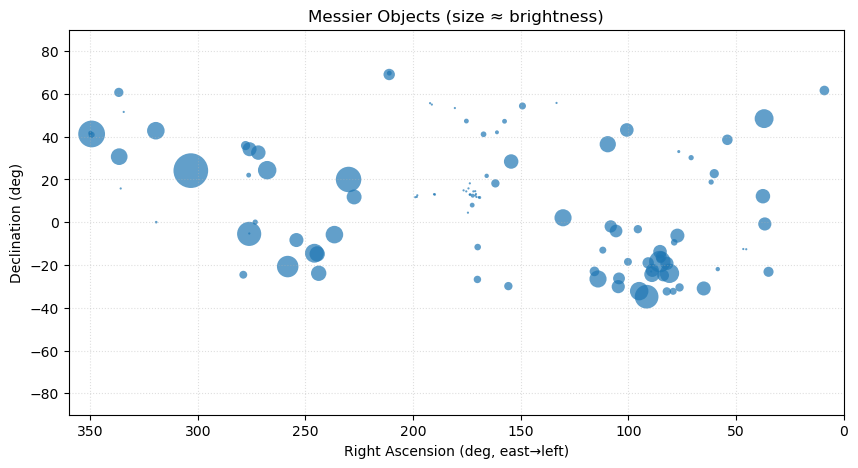

In [141]:
# quick sky map: RA vs Dec (bigger dot = brighter)
m = messier.dropna(subset=["RA_deg", "Dec_deg", "Magnitude"]).copy()

# flip RA so the sky reads east→left like real star charts
x = 360 - m["RA_deg"]
y = m["Dec_deg"]

# simple size scale: brighter (smaller mag) -> larger marker
sizes = (9.5 - m["Magnitude"]).clip(lower=0.5) ** 2 * 10

plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=sizes, alpha=0.7, edgecolors="none")
plt.xlim(360, 0)
plt.ylim(-90, 90)
plt.xlabel("Right Ascension (deg, east→left)")
plt.ylabel("Declination (deg)")
plt.title("Messier Objects (size ≈ brightness)")
plt.grid(True, linestyle=":", alpha=0.4)
plt.show()

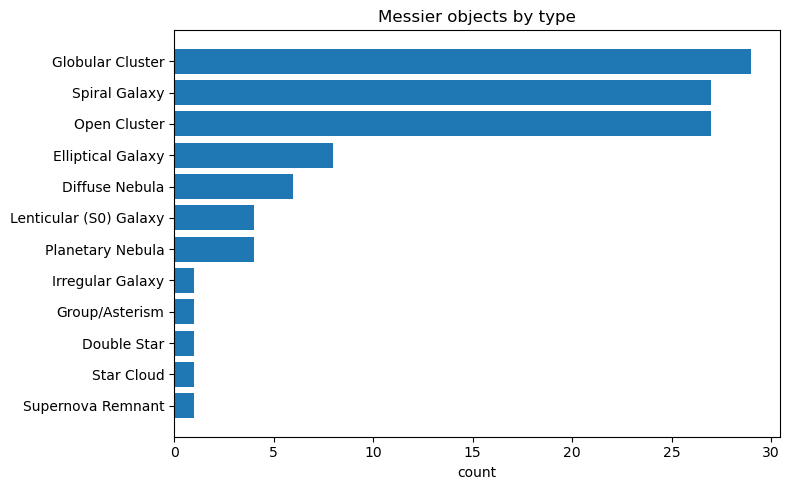

In [142]:
# breakdown by object type (table + bar)
type_counts = (
    messier["Type"]
    .value_counts()
    .sort_values(ascending=True)
)

# table
type_counts.to_frame("count")

# bar chart

plt.figure(figsize=(8, 5))
plt.barh(type_counts.index.to_list(), type_counts.values)
plt.xlabel("count")
plt.title("Messier objects by type")
plt.tight_layout()
plt.show()

In [143]:
# Make a compact finder table (sorted by brightest first).
# If RA_hms/Dec_dms aren't present yet, compute them here.
if not {"RA_hms", "Dec_dms"}.issubset(messier.columns):
    c = SkyCoord(ra=messier["RA_deg"].values * u.deg,
                 dec=messier["Dec_deg"].values * u.deg,
                 frame="icrs")
    messier["RA_hms"]  = c.ra.to_string(unit=u.hour, sep=":", precision=2, pad=True)
    messier["Dec_dms"] = c.dec.to_string(unit=u.deg,  sep=":", precision=1, pad=True, alwayssign=True)

cols_wanted = ["M", "Name", "Type", "Constellation", "Magnitude",
               "RA_hms", "Dec_dms", "RA_deg", "Dec_deg"]
cols = [c for c in cols_wanted if c in messier.columns]  # be tolerant

finder = (
    messier[cols]
    .dropna(subset=["Magnitude"])    # need mag for sorting
    .sort_values("Magnitude")        # smaller mag = brighter
    .reset_index(drop=True)
)

print("rows:", len(finder))
finder.head(20)

rows: 109


,M,Name,Type,Constellation,Magnitude,RA_hms,Dec_dms,RA_deg,Dec_deg
0,45,"Pleiades, Subaru, Seven Sisters",Open Cluster,Taurus,1.6,03:47:00.00,+24:07:12.0,56.750,24.120000
1,31,NGC 224 Andromeda Galaxy,Spiral Galaxy,Andromeda,3.4,00:42:42.00,+41:16:00.0,10.675,41.266667
2,44,NGC 2632 Beehive Cluster (Praesepe),Open Cluster,Cancer,3.7,08:40:06.00,+19:59:00.0,130.025,19.983333
3,42,NGC 1976 Great Orion Nebula,Diffuse Nebula,Orion,4.0,05:35:24.00,-05:27:00.0,83.850,-5.450000
4,7,NGC 6475 Ptolemy¹s Cluster,Open Cluster,Scorpius,4.1,17:53:54.00,-34:49:00.0,268.475,-34.816667
5,41,NGC 2287,Open Cluster,Canis Major,4.6,06:47:00.00,-20:44:00.0,101.750,-20.733333
6,24,NGC 6603 Milky Way Patch,Star Cloud,Sagittarius,4.6,18:18:24.00,-18:25:00.0,274.600,-18.416667
7,22,NGC 6656,Globular Cluster,Sagittarius,5.1,18:36:24.00,-23:54:00.0,279.100,-23.900000
8,47,NGC 2422,Open Cluster,Puppis,5.2,07:36:36.00,-14:30:00.0,114.150,-14.500000
9,39,NGC 7092,Open Cluster,Cygnus,5.2,21:32:12.00,+48:26:00.0,323.050,48.433333


In [144]:
# quick finder: filter by type / constellation / magnitude
def find(type=None, mag=None, const=None, n=20, cols=None):
    df = finder.copy()
    if type:   # match part of the type, case-insensitive (e.g., "open", "galaxy")
        df = df[df["Type"].str.contains(type, case=False, na=False)]
    if const:  # match part of the constellation name (e.g., "Scorpi", "Androm")
        df = df[df["Constellation"].str.contains(const, case=False, na=False)]
    if mag is not None:  # keep only objects this bright or brighter
        df = df[df["Magnitude"] <= float(mag)]
    df = df.sort_values(["Magnitude", "M"]).reset_index(drop=True)
    if cols is None:
        cols = ["M", "Name", "Type", "Constellation", "Magnitude", "RA_hms", "Dec_dms"]
    return df[cols].head(n)

# examples to try
find(type="open", mag=6.5)
find(const="Scorpi", mag=6)
find(type="galaxy", mag=9, n=15)

,M,Name,Type,Constellation,Magnitude,RA_hms,Dec_dms
0,31,NGC 224 Andromeda Galaxy,Spiral Galaxy,Andromeda,3.4,00:42:42.00,+41:16:00.0
1,33,NGC 598 Triangulum/Pinwheel Galaxy,Spiral Galaxy,Triangulum,5.7,01:33:54.00,+30:39:00.0
2,81,NGC 3031 Bode¹s Galaxy,Spiral Galaxy,Ursa Major,6.9,09:55:36.00,+69:04:00.0
3,83,NGC 5236 Southern Pinwheel Galaxy,Spiral Galaxy,Hydra,7.6,13:37:00.00,-29:52:00.0
4,101,NGC 5457 Pinwheel Galaxy,Spiral Galaxy,Ursa Major,7.9,14:03:12.00,+54:21:00.0
5,104,NGC 4594 Sombrero Galaxy,Spiral Galaxy,Virgo,8.0,12:40:00.00,-11:37:00.0
6,32,NGC 221 Satellite of M31,Elliptical Galaxy,Andromeda,8.1,00:42:42.00,+40:52:00.0
7,94,NGC 4736,Spiral Galaxy,Canes Venatici,8.2,12:50:54.00,+41:07:00.0
8,49,NGC 4472,Elliptical Galaxy,Virgo,8.4,12:29:48.00,+08:00:00.0
9,51,NGC 5194 Whirlpool Galaxy,Spiral Galaxy,Canes Venatici,8.4,13:29:54.00,+47:12:00.0


n = 109 | min = 1.6 | max = 10.2 | median = 7.6


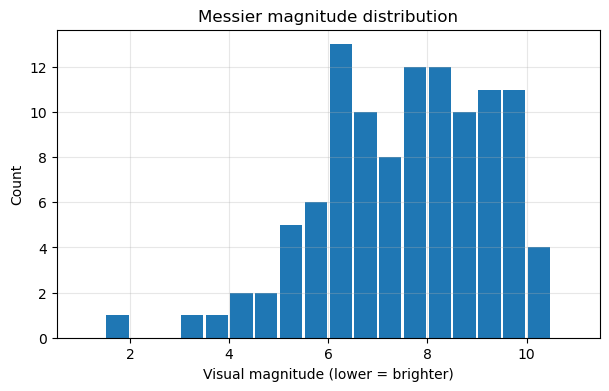

In [145]:
# magnitude histogram + quick stats
mags = messier["Magnitude"].dropna()

print("n =", len(mags),
      "| min =", mags.min(),
      "| max =", mags.max(),
      "| median =", mags.median())

plt.figure(figsize=(7, 4))
bins = np.arange(np.floor(mags.min()), np.ceil(mags.max()) + 0.5, 0.5)
plt.hist(mags, bins=bins, rwidth=0.9)
plt.xlabel("Visual magnitude (lower = brighter)")
plt.ylabel("Count")
plt.title("Messier magnitude distribution")
plt.grid(True, alpha=0.3)
plt.show()

In [146]:
# bucket Type into 3 big groups and make it a categorical column

def _bucket_type(t):
    s = "" if pd.isna(t) else str(t).strip().lower()
    if "galaxy" in s:
        return "Galaxy"
    if "nebula" in s or "remnant" in s:
        return "Nebula"
    if "cluster" in s or "asterism" in s or "star cloud" in s:
        return "Cluster"
    return "Other"

messier["TypeCat"] = messier["Type"].map(_bucket_type)
messier["TypeCat"] = pd.Categorical(
    messier["TypeCat"],
    categories=["Galaxy", "Nebula", "Cluster", "Other"],
    ordered=True,
)

# quick sanity
print(messier["TypeCat"].value_counts().to_string())
messier[["M", "Name", "Type", "TypeCat"]].head(10)

TypeCat
Cluster    58
Galaxy     40
Nebula     11
Other       1


,M,Name,Type,TypeCat
0,1,NGC 1952 Crab Nebula,Supernova Remnant,Nebula
1,2,NGC 7089,Globular Cluster,Cluster
2,3,NGC 5272,Globular Cluster,Cluster
3,4,NGC 6121,Globular Cluster,Cluster
4,5,NGC 5904,Globular Cluster,Cluster
5,6,NGC 6405 Butterfly Cluster,Open Cluster,Cluster
6,7,NGC 6475 Ptolemy¹s Cluster,Open Cluster,Cluster
7,8,NGC 6523 Lagoon Nebula,Diffuse Nebula,Nebula
8,9,NGC 6333,Globular Cluster,Cluster
9,10,NGC 6254,Globular Cluster,Cluster


In [147]:
# add BestMonth and Season from RA (northern hemisphere)

# RA in hours
ra_h = (messier["RA_deg"] / 15.0) % 24

# month centers at local midnight (Sun_RA + 12h):
# Jan..Dec  → [8, 10, 12, 14, 16, 18, 20, 22, 0, 2, 4, 6] hours
month_centers = np.array([8, 10, 12, 14, 16, 18, 20, 22, 0, 2, 4, 6], dtype=float)
month_names   = np.array(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
)

# choose the nearest month center on a circle (0–24h wrap)
# circular distance trick: ((x - c + 12) % 24) - 12  → in [-12, +12]
diff = ((ra_h.values[:, None] - month_centers[None, :] + 12) % 24) - 12
best_idx = np.argmin(np.abs(diff), axis=1)

messier["BestMonth"] = month_names[best_idx]

# simple seasons (northern hemisphere)
season_map = {
    "Dec": "Winter", "Jan": "Winter", "Feb": "Winter",
    "Mar": "Spring", "Apr": "Spring", "May": "Spring",
    "Jun": "Summer", "Jul": "Summer", "Aug": "Summer",
    "Sep": "Fall",   "Oct": "Fall",   "Nov": "Fall",
}
messier["Season"] = messier["BestMonth"].map(season_map)

# quick peek
print(messier["Season"].value_counts().to_string())
messier[["M","Name","RA_deg","BestMonth","Season","TypeCat"]].head(12)

Season
Spring    41
Summer    36
Winter    22
Fall      11


,M,Name,RA_deg,BestMonth,Season,TypeCat
0,1,NGC 1952 Crab Nebula,83.625,Dec,Winter,Nebula
1,2,NGC 7089,323.375,Aug,Summer,Cluster
2,3,NGC 5272,205.550,Apr,Spring,Cluster
3,4,NGC 6121,245.900,May,Spring,Cluster
4,5,NGC 5904,229.650,May,Spring,Cluster
5,6,NGC 6405 Butterfly Cluster,265.025,Jun,Summer,Cluster
6,7,NGC 6475 Ptolemy¹s Cluster,268.475,Jun,Summer,Cluster
7,8,NGC 6523 Lagoon Nebula,270.950,Jun,Summer,Nebula
8,9,NGC 6333,259.800,Jun,Summer,Cluster
9,10,NGC 6254,254.275,May,Spring,Cluster


In [148]:
# get objects by season or by month, with optional brightness/type filters
# season: "winter"/"spring"/"summer"/"fall" (case-insensitive; "autumn" → "fall")
# month: full or 3-letter name ("September" or "Sep")
# max_mag: keep objects with Magnitude <= max_mag (brighter)
# typecat: "galaxy" | "nebula" | "cluster" (matches your TypeCat)
# n: number of rows to show
def get_by_season(season=None, month=None, max_mag=None, typecat=None, n=20, cols=None):
    df = messier.copy()

    # normalize season
    if season is not None:
        s = str(season).strip().lower()
        s = {"autumn": "fall"}.get(s, s)
        s = s.capitalize()  # "Spring", "Fall", ...
        df = df[df["Season"] == s]

    # normalize month
    if month is not None:
        m = str(month).strip().lower()[:3]
        month_map = {
            "jan":"Jan","feb":"Feb","mar":"Mar","apr":"Apr","may":"May","jun":"Jun",
            "jul":"Jul","aug":"Aug","sep":"Sep","oct":"Oct","nov":"Nov","dec":"Dec"
        }
        if m not in month_map:
            raise ValueError("month must be a real month name like 'Sep' or 'September'")
        df = df[df["BestMonth"] == month_map[m]]

    # brightness filter (lower = brighter)
    if max_mag is not None:
        df = df[df["Magnitude"] <= float(max_mag)]

    # type bucket filter (Galaxy / Nebula / Cluster)
    if typecat is not None:
        t = str(typecat).strip().lower()
        t = t.capitalize()  # "Galaxy", "Nebula", "Cluster"
        df = df[df["TypeCat"] == t]

    # columns to show
    if cols is None:
        cols = ["M","Name","TypeCat","Type","Constellation","Magnitude","RA_hms","Dec_dms","BestMonth","Season"]

    out = df.sort_values("Magnitude", na_position="last")[cols].reset_index(drop=True)
    return out.head(n)

In [149]:
get_by_season(season="spring", max_mag=7, typecat="galaxy", n=12)
get_by_season(month="Oct", n=15)
get_by_season(season="autumn", typecat="cluster", n=10)

,M,Name,TypeCat,Type,Constellation,Magnitude,RA_hms,Dec_dms,BestMonth,Season
0,45,"Pleiades, Subaru, Seven Sisters",Cluster,Open Cluster,Taurus,1.6,03:47:00.00,+24:07:12.0,Nov,Fall
1,34,NGC 1039,Cluster,Open Cluster,Perseus,5.5,02:42:00.00,+42:47:00.0,Oct,Fall
2,52,NGC 7654,Cluster,Open Cluster,Cassiopeia,7.3,23:24:12.00,+61:35:00.0,Sep,Fall
3,103,NGC 581,Cluster,Open Cluster,Cassiopeia,7.4,01:33:12.00,+60:42:00.0,Oct,Fall


In [150]:
# simple equipment tiers (max visual magnitude you can reasonably reach)
equipment_tiers = {
    "binoculars":   {"max_mag": 6.5},  # 7x50 / 10x50 under decent skies
    "small_scope":  {"max_mag": 8.0},  # ~80–100 mm
    "medium_scope": {"max_mag": 9.0},  # ~130–200 mm
    "big_scope":    {"max_mag": 10.0}, # 250 mm+
}

def plan_by_season(season, tier="small_scope", typecat=None, n=20, cols=None):
    """Return a brightness-limited list for a season using the tier limits."""
    max_mag = equipment_tiers[tier]["max_mag"]
    return get_by_season(season=season, max_mag=max_mag, typecat=typecat, n=n, cols=cols)

def plan_by_month(month, tier="small_scope", typecat=None, n=20, cols=None):
    """Same idea but for a specific month."""
    max_mag = equipment_tiers[tier]["max_mag"]
    return get_by_season(month=month, max_mag=max_mag, typecat=typecat, n=n, cols=cols)


display(plan_by_season("spring", tier="big_scope", typecat="galaxy", n=12))
display(plan_by_month("Oct", tier="medium_scope", typecat="cluster", n=15))

,M,Name,TypeCat,Type,Constellation,Magnitude,RA_hms,Dec_dms,BestMonth,Season
0,83,NGC 5236 Southern Pinwheel Galaxy,Galaxy,Spiral Galaxy,Hydra,7.6,13:37:00.00,-29:52:00.0,Apr,Spring
1,101,NGC 5457 Pinwheel Galaxy,Galaxy,Spiral Galaxy,Ursa Major,7.9,14:03:12.00,+54:21:00.0,Apr,Spring
2,104,NGC 4594 Sombrero Galaxy,Galaxy,Spiral Galaxy,Virgo,8.0,12:40:00.00,-11:37:00.0,Mar,Spring
3,94,NGC 4736,Galaxy,Spiral Galaxy,Canes Venatici,8.2,12:50:54.00,+41:07:00.0,Mar,Spring
4,49,NGC 4472,Galaxy,Elliptical Galaxy,Virgo,8.4,12:29:48.00,+08:00:00.0,Mar,Spring
5,51,NGC 5194 Whirlpool Galaxy,Galaxy,Spiral Galaxy,Canes Venatici,8.4,13:29:54.00,+47:12:00.0,Apr,Spring
6,106,NGC 4258,Galaxy,Spiral Galaxy,Canes Venatici,8.4,12:19:00.00,+47:18:00.0,Mar,Spring
7,64,NGC 4826 Blackeye Galaxy,Galaxy,Spiral Galaxy,Coma Berenices,8.5,12:56:42.00,+21:41:00.0,Mar,Spring
8,63,NGC 5055 Sunflower Galaxy,Galaxy,Spiral Galaxy,Canes Venatici,8.6,13:15:48.00,+42:02:00.0,Apr,Spring
9,87,NGC 4486 Virgo A,Galaxy,Elliptical Galaxy,Virgo,8.6,12:30:48.00,+12:24:00.0,Mar,Spring


,M,Name,TypeCat,Type,Constellation,Magnitude,RA_hms,Dec_dms,BestMonth,Season
0,34,NGC 1039,Cluster,Open Cluster,Perseus,5.5,02:42:00.00,+42:47:00.0,Oct,Fall
1,103,NGC 581,Cluster,Open Cluster,Cassiopeia,7.4,01:33:12.00,+60:42:00.0,Oct,Fall


In [151]:
# export a plan to CSV
def export_plan(df, filename="plan.csv", folder="data"):
    Path(folder).mkdir(exist_ok=True)
    out_path = Path(folder) / filename
    df.to_csv(out_path, index=False)
    print("saved:", out_path)
    return out_path

# example: make a plan and save it
spring_galaxies_small = plan_by_season("spring", tier="small_scope", typecat="galaxy", n=15)
export_plan(spring_galaxies_small, "spring_galaxies_small_scope.csv")
spring_galaxies_small.head()

saved: data/spring_galaxies_small_scope.csv


,M,Name,TypeCat,Type,Constellation,Magnitude,RA_hms,Dec_dms,BestMonth,Season
0,83,NGC 5236 Southern Pinwheel Galaxy,Galaxy,Spiral Galaxy,Hydra,7.6,13:37:00.00,-29:52:00.0,Apr,Spring
1,101,NGC 5457 Pinwheel Galaxy,Galaxy,Spiral Galaxy,Ursa Major,7.9,14:03:12.00,+54:21:00.0,Apr,Spring
2,104,NGC 4594 Sombrero Galaxy,Galaxy,Spiral Galaxy,Virgo,8.0,12:40:00.00,-11:37:00.0,Mar,Spring


In [152]:
# sky chart for a plan (east-left like a star chart)
def plot_plan(df, title=None, annotate=False):
    # just keep M from whatever plan i'm plotting
    plan_ids = df[["M"]].drop_duplicates()
    # join to master so i always have RA/Dec/Mag/Name/Type
    base = messier[["M", "RA_deg", "Dec_deg", "Magnitude", "Name", "TypeCat"]]
    merged = plan_ids.merge(base, on="M", how="left")

    # flip RA so east is on the left
    x = 360 - merged["RA_deg"]
    y = merged["Dec_deg"]

    # bigger dot = brighter (lower mag); fallback if mag is missing
    mags = merged["Magnitude"].fillna(9.9)
    sizes = (9.5 - mags).clip(lower=0.5) ** 2 * 20

    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, s=sizes, alpha=0.85, edgecolors="none")
    if annotate:
        for xx, yy, name in zip(x, y, merged["Name"]):
            plt.text(xx, yy, str(name), fontsize=8, ha="left", va="bottom")

    plt.xlim(360, 0)
    plt.ylim(-90, 90)
    plt.xlabel("Right Ascension (deg, east-left)")
    plt.ylabel("Declination (deg)")
    plt.title(title or "Observing plan")
    plt.grid(True, linestyle=":", alpha=0.4)
    plt.show()

# example (commented)
#plot_plan(spring_galaxies_small, title="spring galaxies — small scope", annotate=False)

In [153]:
# quick queries i'll reuse

def filter_by_type(typecat=None, type_contains=None, max_mag=None, n=20, cols=None):
    # slice by broad type or a substring; optional brightness cap
    df = messier.copy()

    if typecat:
        t = str(typecat).strip().lower()
        df = df[df["TypeCat"].str.lower() == t]

    if type_contains:
        df = df[df["Type"].str.contains(str(type_contains), case=False, na=False)]

    if max_mag is not None:
        df = df[df["Magnitude"].notna() & (df["Magnitude"] <= float(max_mag))]

    if cols is None:
        cols = ["M","Name","TypeCat","Type","Constellation","Magnitude",
                "RA_hms","Dec_dms","BestMonth","Season"]
    cols = [c for c in cols if c in df.columns]

    return (df.sort_values("Magnitude", na_position="last")[cols]
              .reset_index(drop=True)
              .head(int(n)))


def find_by_magnitude(max_mag, min_mag=None, n=20, cols=None):
    # brightest first inside a mag range (lower mag = brighter)
    df = messier[messier["Magnitude"].notna()].copy()
    df = df[df["Magnitude"] <= float(max_mag)]
    if min_mag is not None:
        df = df[df["Magnitude"] >= float(min_mag)]

    if cols is None:
        cols = ["M","Name","TypeCat","Type","Constellation","Magnitude",
                "RA_hms","Dec_dms","BestMonth","Season"]
    cols = [c for c in cols if c in df.columns]

    return (df.sort_values("Magnitude", na_position="last")[cols]
              .reset_index(drop=True)
              .head(int(n)))


# tiny “story” for one object
_object_snippets = {
    31: "andromeda galaxy; bright core + faint disk in binoculars.",
    42: "orion nebula; look for the trapezium stars.",
    45: "pleiades; easy in city skies, blue haze in dark skies.",
    51: "whirlpool; spiral arms possible on steady, dark nights.",
    13: "m13 hercules cluster; resolves into tons of stars.",
}

def get_object_story(m):
    # short blurb using table fields + an extra tip if i have one
    m = int(m)
    row = messier.loc[messier["M"] == m]
    if row.empty:
        return f"M{m}: not in table."

    r = row.iloc[0]
    mag_txt = f"{r['Magnitude']:.1f}" if pd.notna(r["Magnitude"]) else "—"
    base = (
        f"M{m}: {r.get('Name','').strip()} — {str(r.get('Type','')).lower()} in {r.get('Constellation','')}.\n"
        f"mag ~{mag_txt}; best month {r.get('BestMonth','?')}. "
        f"RA {r.get('RA_hms','?')}, Dec {r.get('Dec_dms','?')}."
    )
    tip = _object_snippets.get(m)
    return base if tip is None else base + "\n" + tip

In [154]:
# quick demo (uncomment if i want a table sample)
# display(filter_by_type(typecat="galaxy", max_mag=7, n=8))
# display(find_by_magnitude(max_mag=6.5, n=10))

print(get_object_story(31))  # andromeda sanity check

M31: NGC 224 Andromeda Galaxy — spiral galaxy in Andromeda.
mag ~3.4; best month Sep. RA 00:42:42.00, Dec +41:16:00.0.
andromeda galaxy; bright core + faint disk in binoculars.


In [155]:
# month -> rough RA (hours) on the meridian at midnight
_MONTH_TO_RA_H = {
    "jan": 6,  "feb": 8,  "mar": 10, "apr": 12,
    "may": 14, "jun": 16, "jul": 18, "aug": 20,
    "sep": 22, "oct": 0,  "nov": 2,  "dec": 4,
}

def _midnight_ra_for_month(month):
    # take first 3 letters like "oct"
    m = str(month).strip().lower()[:3]
    if m not in _MONTH_TO_RA_H:
        raise ValueError("month should be like 'Oct' or 'October'")
    return float(_MONTH_TO_RA_H[m])

def _max_altitude_deg(lat_deg, dec_deg):
    # max altitude at transit: 90 - |lat - dec|
    return 90.0 - abs(lat_deg - dec_deg)

def _month_gap(obj_ra_h, month_ra_h):
    # how far the object's RA is from the month's midnight RA (0..6 months)
    ha = abs(((obj_ra_h - month_ra_h + 12) % 24) - 12)  # 0..12 hours
    return ha / 2.0  # ~months

def _apply_tier(df, tier, fallback_max=9.5):
    # filter by my gear brightness limit (uses equipment_tiers from above)
    max_mag = equipment_tiers.get(tier, {}).get("max_mag", fallback_max)
    return df[df["Magnitude"].fillna(99) <= max_mag].copy()

def rank_visible_topN(lat_deg,
                      month,
                      tier="small_scope",
                      typecat=None,
                      min_alt=25.0,
                      n=5):
    # main: build a top N list for a location + month

    month_ra = _midnight_ra_for_month(month)

    df = messier.copy()
    if typecat:
        t = str(typecat).strip().capitalize()
        df = df[df["TypeCat"] == t]

    # gear limit
    df = _apply_tier(df, tier)

    # features we sort by
    ra_h = df["RA_deg"] / 15.0
    alt_max = _max_altitude_deg(lat_deg, df["Dec_deg"])
    gap_mo = _month_gap(ra_h, month_ra)

    # toss out stuff that never gets high enough
    df = df.assign(AltMax_deg=alt_max, MonthGap=gap_mo)
    df = df[df["AltMax_deg"] >= min_alt].copy()
    if df.empty:
        return df  # nothing fits

    # simple score = bright + high + in-season
    b = np.clip((10.0 - df["Magnitude"]) / 10.0, 0, 1)                  # brighter better
    a = np.clip((df["AltMax_deg"] - min_alt) / (90.0 - min_alt), 0, 1)  # higher better
    m = np.clip(1.0 - df["MonthGap"] / 6.0, 0, 1)                       # in-season better
    score = 0.5*b + 0.35*a + 0.15*m

    df = df.assign(Score=score).sort_values(["Score", "Magnitude"],
                                            ascending=[False, True])

    cols = ["M","Name","TypeCat","Type","Constellation","Magnitude",
            "RA_hms","Dec_dms","BestMonth","Season","AltMax_deg","MonthGap","Score"]
    cols = [c for c in cols if c in df.columns]  # safe if any column is missing

    return df[cols].reset_index(drop=True).head(n)

In [156]:
# top 5 helper (no example calls here)
def suggest_top5(lat_deg: float,
                 month: str,
                 tier: str = "small_scope",
                 typecat: str | None = None,
                 title: str | None = None,
                 export_csv: bool = False):
    """top 5 targets for a location/month; can also plot and save csv"""
    top5 = rank_visible_topN(lat_deg=lat_deg, month=month, tier=tier, typecat=typecat, n=5)
    if top5.empty:
        print("no objects with these settings. try a brighter tier or a different month.")
        return top5
    display(top5)
    if title is None:
        tcat = typecat if typecat else "all types"
        title = f"Top 5 for {month.title()} @ lat {lat_deg:.1f}°, tier {tier} ({tcat})"
    try:
        plot_plan(top5, title=title, annotate=True)
    except Exception:
        pass
    if export_csv:
        fn = f"plan_top5_{month.lower()}_{tier}.csv".replace(" ", "_")
        export_plan(top5, fn)
    return top5

how i run it (pick one)
columbus ~40°N, oct, small scope
suggest_top5(40.0, "Oct", tier="small_scope")

clusters only
suggest_top5(40.0, "Oct", tier="medium_scope", typecat="cluster")

,M,Name,TypeCat,Type,Constellation,Magnitude,RA_hms,Dec_dms,BestMonth,Season,AltMax_deg,MonthGap,Score
0,31,NGC 224 Andromeda Galaxy,Galaxy,Spiral Galaxy,Andromeda,3.4,00:42:42.00,+41:16:00.0,Sep,Fall,88.733333,0.355833,0.814284
1,45,"Pleiades, Subaru, Seven Sisters",Cluster,Open Cluster,Taurus,1.6,03:47:00.00,+24:07:12.0,Nov,Fall,74.120000,1.891667,0.787201
2,34,NGC 1039,Cluster,Open Cluster,Perseus,5.5,02:42:00.00,+42:47:00.0,Oct,Fall,87.216667,1.350000,0.676263
3,39,NGC 7092,Cluster,Open Cluster,Cygnus,5.2,21:32:12.00,+48:26:00.0,Aug,Summer,81.566667,1.231667,0.663798
4,33,NGC 598 Triangulum/Pinwheel Galaxy,Galaxy,Spiral Galaxy,Triangulum,5.7,01:33:54.00,+30:39:00.0,Oct,Fall,80.650000,0.782500,0.645091


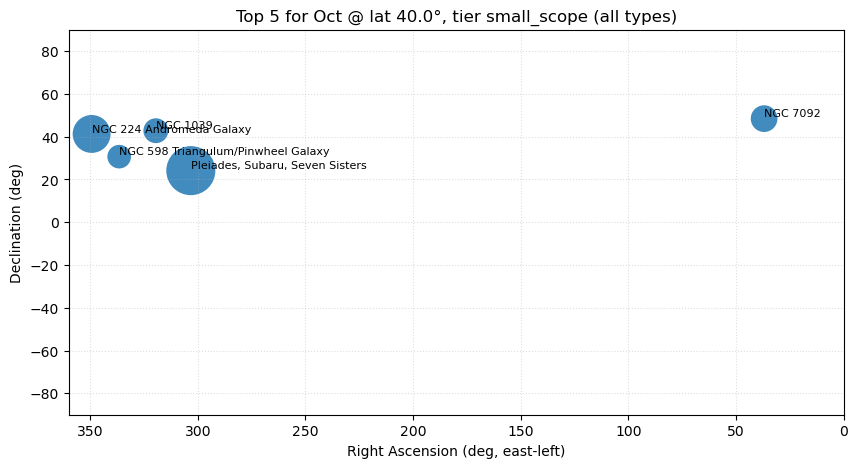

saved: data/plan_top5_oct_small_scope.csv


In [157]:
# knobs
LAT = 40.0
MONTH = "Oct"          # full or 3-letter
TIER = "small_scope"   # binoculars | small_scope | medium_scope | big_scope
TYPECAT = None         # None = all types; or "galaxy" / "cluster"
EXPORT = True          # save CSV to data/

top5 = suggest_top5(LAT, MONTH, tier=TIER, typecat=TYPECAT, export_csv=EXPORT)

In [158]:
%pip install -q anthropic

import os
from anthropic import Anthropic

client = Anthropic(api_key=os.getenv("ANTHROPIC_API_KEY"))

msg = client.messages.create(
    model="claude-haiku-4-5-20251001",  # or the newest Sonnet/Haiku you have
    max_tokens=200,
    messages=[{"role": "user", "content": "Say OK if you can read this."}],
)
print(msg.content[0].text)

Note: you may need to restart the kernel to use updated packages.
OK


In [159]:
from dotenv import load_dotenv
load_dotenv(override=True)

import os, re
raw = os.getenv("ANTHROPIC_API_KEY")
print("present?", raw is not None)
#print("repr:", repr(raw))
print("looks ok:", bool(re.fullmatch(r"sk-ant-[A-Za-z0-9._-]{20,}", (raw or "").strip())))

present? True
looks ok: True


In [160]:
# upgrade SDK (safe to re-run)
%pip install -q -U anthropic

import os
from anthropic import Anthropic

client = Anthropic(api_key=os.getenv("ANTHROPIC_API_KEY"))

# 1) See what models your key actually has:
available = [m.id for m in client.models.list().data]
#print("Available models:", available)

# 2) Pick one that appears in the list. Good aliases to try:
PREFERRED = "claude-3-5-sonnet-latest"   # alias (usually available)
if PREFERRED not in available:
    # fall back to *something* you do have (first text model in the list)
    for cand in ("claude-3-opus-latest","claude-3-haiku-latest","claude-3-sonnet-20240229"):
        if cand in available:
            PREFERRED = cand
            break
    else:
        PREFERRED = available[0]  # last resort

#print("Using model:", PREFERRED)

# 3) Test a simple call
msg = client.messages.create(
    model=PREFERRED,
    max_tokens=100,
    messages=[{"role": "user", "content": "Say OK if you can read this."}],
)
#print(msg.content[0].text)

Note: you may need to restart the kernel to use updated packages.


In [161]:
# --- Minimal Anthropic smoke test: strict echo + JSON extract ---
import os, re, json
from anthropic import Anthropic

client = Anthropic(api_key=os.getenv("ANTHROPIC_API_KEY"))

# pick a usable model
try:
    available = [m.id for m in client.models.list().data]
except Exception:
    available = []
PREFERRED = globals().get("PREFERRED")  # if you ran the earlier block
model = PREFERRED if PREFERRED in (available or []) else (available[0] if available else "claude-haiku-4-5-20251001")
print("Using model:", model)

def ask(txt, max_tokens=100):
    msg = client.messages.create(
        model=model,
        max_tokens=max_tokens,
        messages=[{"role": "user", "content": txt}],
    )
    return msg.content[0].text.strip()

# Test 1: strict echo
resp1 = ask("Reply with exactly: OK")
print("Test 1:", "PASS ✅" if resp1 == "OK" else f"FAIL ❌ got: {resp1!r}")

# Test 2: JSON-only response and parsing check
prompt = (
    "Extract city, month, and tier from this text: "
    "'I'm in Columbus, month is Nov, and I'm using a small_scope.' "
    'Return ONLY a JSON object like {"city":"...","month":"...","tier":"..."} with double quotes.'
)
resp2 = ask(prompt)
# strip optional code fences
resp2_clean = re.sub(r"^\s*```(?:json)?\s*|\s*```\s*$", "", resp2, flags=re.DOTALL)
try:
    data = json.loads(resp2_clean)
    ok = set(data.keys()) == {"city", "month", "tier"}
    print("JSON:", data)
    print("Test 2:", "PASS ✅" if ok else f"FAIL ❌ wrong keys: {list(data.keys())}")
except json.JSONDecodeError:
    print("Test 2: FAIL ❌ could not parse JSON\nRaw:\n", resp2)

Using model: claude-haiku-4-5-20251001
Test 1: PASS ✅
JSON: {'city': 'Columbus', 'month': 'Nov', 'tier': 'small_scope'}
Test 2: PASS ✅


In [ ]:
# City → lat/lon with simple clarification (state/province) only when needed,
# then build Top 5, flat chart, and dome view. Gear → tier chosen by LLM (fallback = heuristic).
# NEW: "Freedom units" chart for the best-scored target (bars: football fields, mcchickens, AU, city blocks;
#      text breakdown ALSO shows lightyears, but lightyears is NOT plotted).

from datetime import datetime, timedelta
import os, re, json
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

# --- month helper (3-letter) ---
_month3 = {
    "jan":"Jan","feb":"Feb","mar":"Mar","apr":"Apr","may":"May","jun":"Jun",
    "jul":"Jul","aug":"Aug","sep":"Sep","oct":"Oct","nov":"Nov","dec":"Dec"
}

# --- optional Anthropic client (for gear → tier) ---
try:
    from anthropic import Anthropic
    _anth = Anthropic(api_key=os.getenv("ANTHROPIC_API_KEY"))
    _models = [m.id for m in _anth.models.list().data]
    _anth_model = (
        "claude-3-5-sonnet-latest"
        if "claude-3-5-sonnet-latest" in _models
        else ("claude-3-5-haiku-latest" if "claude-3-5-haiku-latest" in _models else (_models[0] if _models else None))
    )
except Exception:
    _anth, _anth_model = None, None

def _ask_llm_for_tier(gear_text: str) -> str | None:
    if not (_anth and _anth_model):
        return None
    prompt = (
        "Classify the user's observing gear into one tier.\n"
        "Allowed tiers: \"small_scope\", \"medium_scope\", \"big_scope\".\n"
        "Rules:\n"
        "- Naked-eye or binoculars -> small_scope.\n"
        "- Telescopes: convert aperture to mm if possible.\n"
        "  <120 mm -> small_scope; 120–200 mm -> medium_scope; ≥250 mm -> big_scope.\n"
        "- If unclear, choose small_scope.\n"
        "Return ONLY JSON like {\"tier\":\"medium_scope\"}.\n"
        f"Gear: {gear_text!r}"
    )
    try:
        msg = _anth.messages.create(
            model=_anth_model,
            max_tokens=60,
            messages=[{"role": "user", "content": prompt}],
        )
        txt = msg.content[0].text.strip()
        m = re.search(r'\{[^{}]*"tier"\s*:\s*"(?P<t>small_scope|medium_scope|big_scope)"[^{}]*\}', txt, flags=re.I)
        if m:
            return m.group("t")
    except Exception:
        pass
    return None

# --- geocoder ---
_geocode = Nominatim(user_agent="messier_student", timeout=10)

def _label_from_addr(raw):
    a = (raw or {}).get("address", {})
    city   = a.get("city") or a.get("town") or a.get("village") or a.get("hamlet") or a.get("state_district") or raw.get("name")
    region = a.get("state") or a.get("region") or a.get("province") or a.get("state_district") or ""
    country= a.get("country", "")
    label = ", ".join([x for x in [city, region, country] if x])
    kind  = (raw.get("type") or "").lower()
    return label, kind, city or "", region or "", country or ""

def geocode_candidates(q: str, limit: int = 12, allow_counties: bool = False):
    try:
        L = _geocode.geocode(q, exactly_one=False, limit=limit, addressdetails=True)
    except Exception:
        L = None
    out, seen = [], set()
    if L:
        for loc in L:
            raw = loc.raw or {}
            label, kind, city, region, country = _label_from_addr(raw)
            if not label or label in seen:
                continue
            seen.add(label)
            is_county = ("county" in kind) or (("county" in (raw.get("display_name","").lower())) and not city)
            if is_county and not allow_counties:
                continue
            imp = float(raw.get("importance", 0.0))
            out.append({
                "label": label,
                "lat": float(loc.latitude),
                "lon": float(loc.longitude),
                "importance": imp,
                "kind": kind,
                "city": city,
                "region": region,
                "country": country
            })

    def _rank(c):
        bonus = 0
        if "state" in c["kind"]: bonus += 3
        if any(k in c["kind"] for k in ("city","town","village","capital")): bonus += 2
        if "county" in c["kind"]: bonus -= 2
        return (bonus, c["importance"])

    out.sort(key=_rank, reverse=True)
    return out

_alias = {
    "la": "Los Angeles, CA, USA",
    "l.a.": "Los Angeles, CA, USA",
    "nyc": "New York City, NY, USA",
}

def resolve_city_interactive(start_text: str, max_rounds: int = 4):
    q = start_text.strip()
    if q.lower() in _alias:
        q = _alias[q.lower()]

    rounds = 0
    while rounds < max_rounds:
        rounds += 1
        if not q or len(q) < 2:
            q = input("City (e.g., 'Springfield, IL' or 'Nairobi, Kenya'): ").strip()
            continue

        allow_counties = "county" in q.lower()
        cands = geocode_candidates(q, allow_counties=allow_counties)

        if not cands:
            print(f"No matches for '{q}'.")
            q = input("Try 'City, State/Province' or 'City, Country' (or 'q' to quit): ").strip()
            if q.lower() in {"q","quit","exit"}:
                raise SystemExit("Aborted: city not resolved.")
            continue

        if len(cands) == 1:
            c = cands[0]
            return (c["lat"], c["lon"]), c["label"]

        base_city = q.split(",")[0].strip()
        region_hint = input(
            f"Which state/province (or country) do you mean for '{base_city}'? "
            "Example: 'IL' or 'Massachusetts' or 'Australia' (or 'q' to quit): "
        ).strip()
        if region_hint.lower() in {"q","quit","exit"}:
            raise SystemExit("Aborted: city not resolved.")
        if not region_hint:
            q = input("Retype as 'City, State/Province' or 'City, Country': ").strip()
            continue

        rh = region_hint.lower()
        narrowed = [c for c in cands if rh in c["region"].lower() or rh in c["country"].lower()]
        if narrowed:
            narrowed.sort(key=lambda c: (("city" in c["kind"]) or ("town" in c["kind"]) or ("village" in c["kind"])), reverse=True)
            c = narrowed[0]
            return (c["lat"], c["lon"]), c["label"]
        else:
            q = f"{base_city}, {region_hint}"

    raise SystemExit("Aborted: city not resolved after several tries.")

# --- gear → tier (LLM first, regex fallback) ---
def _heuristic_tier(gear_text: str) -> str:
    s = gear_text.lower()

    if any(w in s for w in ["naked", "unaided", "bare eye", "bare eyes"]):
        return "small_scope"
    if "binocular" in s:
        return "small_scope"

    # telescope with aperture
    mm = None
    m_mm = re.search(r'(\d+(?:\.\d+)?)\s*mm', s)
    m_in = re.search(r'(\d+(?:\.\d+)?)\s*(?:in|inch|inches|")', s)
    if m_mm:
        mm = float(m_mm.group(1))
    elif m_in:
        mm = float(m_in.group(1)) * 25.4

    if mm is not None:
        if mm < 120:
            return "small_scope"
        elif mm < 200:
            return "medium_scope"
        elif mm >= 250:
            return "big_scope"
        else:
            return "medium_scope"

    # generic "telescope" with no size
    if "telescope" in s or "dob" in s or "newtonian" in s or "refractor" in s or "sct" in s:
        return "medium_scope"

    return "small_scope"

def choose_tier_from_gear() -> str:
    gear = input("What are you using? (naked eye / binoculars / telescope + size, e.g., '8 inch Dob'): ").strip()
    tier = _ask_llm_for_tier(gear) or _heuristic_tier(gear)
    print(f"tier selected: {tier}")
    return tier

# ---- inputs (clarify only when needed) ----
city_raw = input("city (e.g., 'Columbus, OH' or 'Nairobi, Kenya'): ").strip()
(lat_deg, lon_deg), city_label = resolve_city_interactive(city_raw)

month_in = input("month (ex: Oct; blank = current): ").strip()
month = _month3.get(month_in.lower()[:3], datetime.now().strftime("%b")) if month_in else datetime.now().strftime("%b")

tier = choose_tier_from_gear()  # <-- replaces manual tier prompt

type_txt = input("type [galaxy / nebula / cluster] (blank = all): ").strip()
typecat = type_txt.capitalize() if type_txt else None

# ---- build Top 5 and show flat chart (needs your rank_visible_topN, plot_plan) ----
top5 = rank_visible_topN(lat_deg=lat_deg, month=month, tier=tier, typecat=typecat, n=5)

print(f"\ncity: {city_label or 'unknown'}  |  lat ~ {lat_deg:.2f}°  |  month: {month}  |  tier: {tier}  |  type: {typecat or 'all'}")
try:
    display(top5)
except Exception:
    print(top5)

title = f"Top 5 for {city_label or f'lat {lat_deg:.1f}°'} in {month} ({tier})"
plot_plan(top5, title=title, annotate=False)

# ========================  DOME (polar) SKY MAP ADD-ON  ========================

_mon_num = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,
            "Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

def _when_utc_for_month(lon_deg: float, month_str: str) -> Time:
    m3 = month_str[:3].title()
    mon = _mon_num.get(m3, datetime.now().month)
    yr = datetime.now().year
    dt_local = datetime(yr, mon, 15, 22, 0, 0)
    utc_offset_hours = int(round(lon_deg / 15.0))
    dt_utc = dt_local - timedelta(hours=utc_offset_hours)
    return Time(dt_utc)

def plot_dome(plan_df, lat_deg: float, lon_deg: float,
              month_hint: str | None = None,
              title: str | None = None, annotate: bool = False):
    base = messier[["M", "RA_deg", "Dec_deg", "Magnitude", "Name"]]
    merged = base.merge(
        plan_df[["M", "Name", "TypeCat", "Magnitude"]],
        on="M", how="inner", suffixes=("", "_plan")
    )
    if merged.empty:
        print("Nothing to plot.")
        return

    when = _when_utc_for_month(lon_deg, month_hint or datetime.now().strftime("%b"))
    loc = EarthLocation(lat=lat_deg * u.deg, lon=lon_deg * u.deg)

    sc = SkyCoord(ra=merged["RA_deg"].values * u.deg,
                  dec=merged["Dec_deg"].values * u.deg, frame="icrs")
    altaz = sc.transform_to(AltAz(obstime=when, location=loc))
    alt = altaz.alt.deg
    az  = altaz.az.deg

    vis = alt > 0
    if not np.any(vis):
        print("All filtered targets are below the horizon at this time/place.")
        return
    merged = merged.loc[vis].reset_index(drop=True)
    alt = alt[vis]; az = az[vis]

    r = (90.0 - alt) / 90.0
    theta = np.deg2rad(az)
    sizes = np.clip(9.5 - merged["Magnitude"].values, 0.5, None)**2 * 20

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, projection="polar")
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.scatter(theta, r, s=sizes, alpha=0.9, edgecolors="none")

    if annotate:
        for th, rr, name in zip(theta, r, merged["Name"]):
            ax.text(th, rr, name, fontsize=8, ha="left", va="bottom")

    ax.set_rlim(0, 1)
    ax.set_rticks([0.0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["zenith", "75°", "45°", "15°", "horizon"])
    ax.grid(True, linestyle=":", alpha=0.4)
    ax.set_title(title or "Visible sky (dome view)", pad=20)
    plt.show()

# show the dome view too
plot_dome(
    top5,
    lat_deg=lat_deg,
    lon_deg=lon_deg,
    month_hint=month,
    title=f"Dome view — {city_label or f'lat {lat_deg:.1f}°'} in {month} ({tier})",
    annotate=False
)

# ========================  FREEDOM UNITS ADD-ON  ========================
# Distance map (light-years) for common Messier crowd-pleasers.
# Bars: football fields, mcchickens, AU, city blocks.
# Text breakdown ALSO includes lightyears (not plotted).

DIST_LY = {
    1: 6500,        # Crab Nebula
    3: 33900,       # Globular
    5: 24500,       # Globular
    8: 4100,        # Lagoon Nebula
    13: 22200,      # Hercules Cluster
    17: 5000,       # Omega Nebula
    20: 5200,       # Trifid Nebula
    22: 10600,      # Globular
    27: 1360,       # Dumbbell Nebula
    31: 2.54e6,     # Andromeda Galaxy
    33: 2.73e6,     # Triangulum Galaxy
    42: 1344,       # Orion Nebula
    44: 610,        # Beehive
    45: 444,        # Pleiades
    51: 23e6,       # Whirlpool Galaxy
    57: 2300,       # Ring Nebula
    81: 12e6,       # Bode's
    82: 12e6,       # Cigar
    101: 21e6,      # Pinwheel
    104: 29e6,      # Sombrero
}

# Unit sizes
LY_TO_M          = 9.460730472e15
AU_TO_M          = 149_597_870_700       # IAU
FOOTBALL_FIELD_M = 91.44                  # 100 yards (no end zones)
MCCHICKEN_M      = 0.15                   # ~15 cm per McChicken
CITYBLOCK_M      = 100.0                  # canonical "city block" for this chart

def _fmt_sci(x: float) -> str:
    if x == 0:
        return "0"
    exp = int(np.floor(np.log10(abs(x))))
    mant = x / (10**exp)
    return f"{mant:.2f}e{exp:+d}"

def _fmt_eng(x: float) -> str:
    # human-ish compact (K/M/B/T/Q)
    sfx = ["","K","M","B","T","Q"]
    i = 0
    v = float(x)
    while abs(v) >= 1000 and i < len(sfx)-1:
        v /= 1000.0
        i += 1
    return f"{v:.2f}{sfx[i]}"

import matplotlib.gridspec as gridspec

def plot_freedom_units_for_best(top5_df, print_to_console: bool = False):
    if top5_df is None or len(top5_df) == 0:
        print("No top target to plot in freedom units.")
        return
    best = top5_df.iloc[0]
    try:
        mnum = int(best["M"])
    except Exception:
        print("Missing Messier ID; skipping freedom units chart.")
        return

    ly = DIST_LY.get(mnum)
    if ly is None:
        print(f"No distance for M{mnum} ({best.get('Name','')}); skipping freedom units chart.")
        return

    # Convert once
    meters = ly * LY_TO_M

    # Bars (this order): fields, mcchickens, AU, city blocks
    labels = [
        "football fields (100 yd)",
        "mcchickens (~15 cm)",
        "astronomical units (AU)",
        "city blocks (100 m)",
    ]
    divisors_m = [FOOTBALL_FIELD_M, MCCHICKEN_M, AU_TO_M, CITYBLOCK_M]
    counts = [meters/d for d in divisors_m]

    # --- Figure layout: top = bars, bottom = mono text (no overlap) ---
    fig = plt.figure(figsize=(10, 6.8))
    gs  = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[3.0, 1.2], hspace=0.2)

    # Top: bar chart
    ax = fig.add_subplot(gs[0])
    ax.bar(labels, counts)
    ax.set_title(f"How far away is {best.get('Name','object')} (M{mnum})")
    ax.set_ylabel("Count (log scale)")
    ax.set_yscale("log")
    plt.setp(ax.get_xticklabels(), rotation=12, ha="right")

    # Annotate each bar (scientific notation)
    for i, v in enumerate(counts):
        ax.text(i, v, _fmt_sci(v), ha='center', va='bottom', fontsize=9)

    # Bottom: clean text panel (axis off)
    ax_txt = fig.add_subplot(gs[1])
    ax_txt.axis("off")

    breakdown_lines = [
        "Distance breakdown:",
        f"  – lightyears                : {_fmt_eng(ly)}",
        f"  – football fields (100 yd)  : {_fmt_sci(counts[0])}  ({_fmt_eng(counts[0])})",
        f"  – mcchickens (~15 cm)       : {_fmt_sci(counts[1])}  ({_fmt_eng(counts[1])})",
        f"  – astronomical units (AU)   : {_fmt_sci(counts[2])}  ({_fmt_eng(counts[2])})",
        f"  – city blocks (100 m)       : {_fmt_sci(counts[3])}  ({_fmt_eng(counts[3])})",
    ]
    ax_txt.text(0.01, 0.98, "\n".join(breakdown_lines),
                family="monospace", fontsize=10, va="top")

    plt.show()

    if print_to_console:
        print("\n".join(breakdown_lines))

# draw the freedom units chart for the best-scored object
plot_freedom_units_for_best(top5)


The `!pip install` command will install the xlrd package in your environment. After that, the pandas read_excel function should work correctly with your .xls file.